<a href="https://colab.research.google.com/github/SakthiganeshA/Miniproject/blob/main/MINI_PROJECT_4_EBOLA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Questions***   
***Part I***      
1. Distinct # of Indicators in the universe (complete dataset).
2. In the second half of the year 2015, how many countries have one or more “Cumulative number of confirmed Ebola cases”
3. Top 10 total Ebola cases confirmed. Note that Indicator = Cumulative number of confirmed Ebola cases. Include rank based on the total value (=cases confirmed).
4. Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” in 2015 Q2 (i.e., April-June 2015).
5. Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” with only even months of the year 2015 (i.e., months 2, 4, 6, 8, 10, 12).
6. Find Country and Indicator wise total value. Also, rank on the total_value which is the sum at the Country-Indicator level.
7. For those Top 10 countries by Indicator = Cumulative number of confirmed Ebola cases, plot group bar chart.
***Part II***     
1. Read "song.csv" into a dataframe and then produce the following output.
Write Output For Ranked Songs By its Highest Frequency. Whichever song won a particular rank (say 2) with maximum frequency takes that place. For example, Mysong1 won rank 1 for two different years (achieved maximum frequency for that particular rank) and so in output (see row 1 in Output expected below), it should appear as Mysong1 with rank 1 and count 2..
(Note. in the same year, now two songs have same rank.)           
2. House Price Prediction task.
    1. Pre-processing: Convert non-numeric columns (mainroad, guestroom, basement, hotwaterheating, airconditioning) to numeric using one-hot encoding if the column values are not interrelated. If column values are related, need to use ordinal encoding.
    2. Pre-processing: Use pd.get_dummies to convert the one-hot encoding from the previous step into single columns. [link | link]
    3. Use two-fold cross-validation [sklearn]  and predict (use linear regression) the house price (column "price") using features (all columns except "price" are the features). You need output evaluation metrics: R1-squared error, Mean Squared Error (MSE), Root Mean Squared Error (RMSE). Mean Average Error (MAE). See doc for some short introduction for these evaluation metrics. In case the evaluation metrics (RMSE, MAE, MSE etc) have higher value (i.e., high error), then use standard scaler on the target column (column "price") to scale them. Additionally, you can also use standard scaler to scale the numeric features (i.e., those features other than target "price" and columns not converted to numeric using some encoding methods such as ordinal encoding and one-hot encoding). Some sample basic code notebook for Linear Regression (also use the internet for more) that starts with import of LinearRegression from sklearn.linear_model.
3. Create three equal-size buckets of House Price data. Bin the data into 3 quantiles (new column: quantile) of  'low', 'medium', 'high' based on "price" column in the House Price dataset.



***PART I***

In [ ]:
import pandas as pd
from tabulate import tabulate
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as py
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming your CSV file is named 'ebola_data.csv'
data = pd.read_csv('/content/sample_data/DATA SET/ebola_data_db_format.csv')  # Update the file path
display(pd.DataFrame(data))
df = pd.DataFrame(data)

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0
...,...,...,...,...
17580,"Cumulative number of confirmed, probable and s...",Spain,2016-03-23,0.0
17581,Cumulative number of confirmed Ebola deaths,United States of America,2016-03-23,1.0
17582,Cumulative number of probable Ebola deaths,United States of America,2016-03-23,0.0
17583,Cumulative number of suspected Ebola deaths,United States of America,2016-03-23,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
indicators = df['Indicator']
distinct_indicators = indicators.unique()
num_distinct_indicators = len(distinct_indicators)
print(f"There are {num_distinct_indicators} distinct indicators in the dataset.")

There are 36 distinct indicators in the dataset.


In [ ]:
filtered_df = df[(df['Date'] >= '2015-07-01') & (df['Date'] <= '2015-12-31') & (df['Indicator'] == 'Cumulative number of confirmed Ebola cases')]
countries = filtered_df['Country'].unique()
num_countries = len(countries)
print(f"In the second half of 2015, {num_countries} countries had one or more 'Cumulative number of confirmed Ebola cases'.")

In the second half of 2015, 11 countries had one or more 'Cumulative number of confirmed Ebola cases'.


In [ ]:
filtered_df = df[df['Indicator'] == 'Cumulative number of confirmed Ebola cases']
# Access the column using its actual name 'value' (lowercase 'v')
country_totals = filtered_df.groupby('Country')['value'].sum().reset_index()
top_10_countries = country_totals.sort_values(by=['value'], ascending=False).head(10) #Also change this line since we renamed value
top_10_countries['Rank'] = range(1, 11)
print(tabulate(top_10_countries, headers='keys', tablefmt='psql'))

+----+--------------------------+------------------+--------+
|    | Country                  |            value |   Rank |
|----+--------------------------+------------------+--------|
|  8 | Sierra Leone             |      2.04187e+06 |      1 |
|  3 | Liberia                  | 768079           |      2 |
|  0 | Guinea                   | 749622           |      3 |
|  6 | Nigeria                  |   4840           |      4 |
|  5 | Mali                     |   1658           |      5 |
| 11 | United States of America |    967           |      6 |
|  4 | Liberia 2                |    657           |      7 |
|  7 | Senegal                  |    254           |      8 |
|  9 | Spain                    |    243           |      9 |
| 10 | United Kingdom           |    221           |     10 |
+----+--------------------------+------------------+--------+


In [ ]:
df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
Q2_2015 = df[(df['Year'] == 2015) & (df['Month'].isin([4, 5, 6])) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]
Total_Deaths_Q2 = Q2_2015.groupby('Country')['value'].sum().reset_index()
Total_Deaths_Q2['Rank'] = Total_Deaths_Q2['value'].rank(ascending=False)
top_10_Q2_2015 = Total_Deaths_Q2.sort_values(by='value', ascending=False).head(10)
table = tabulate(top_10_Q2_2015[['Country', 'value', 'Rank']],headers=['Country', 'Total Deaths', 'Rank'], tablefmt='grid')
print(table)

+----+--------------------------+----------------+--------+
|    | Country                  |   Total Deaths |   Rank |
+====+==========================+================+========+
|  2 | Liberia                  |         273262 |    1   |
+----+--------------------------+----------------+--------+
|  6 | Sierra Leone             |         226331 |    2   |
+----+--------------------------+----------------+--------+
|  0 | Guinea                   |         139652 |    3   |
+----+--------------------------+----------------+--------+
|  4 | Nigeria                  |            464 |    4   |
+----+--------------------------+----------------+--------+
|  3 | Mali                     |            348 |    5   |
+----+--------------------------+----------------+--------+
|  9 | United States of America |             58 |    6   |
+----+--------------------------+----------------+--------+
|  1 | Italy                    |              0 |    8.5 |
+----+--------------------------+-------

In [ ]:
df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
even_months = [2, 4, 6, 8, 10, 12]
odd_months = [1, 3, 5, 7, 9, 11]
even_months_2015 = df[(df['Year'] == 2015) & (df['Month'].isin(even_months)) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]
total_deaths_even_months = even_months_2015.groupby('Country')['value'].sum().reset_index()
total_deaths_even_months['Rank'] = total_deaths_even_months['value'].rank(ascending=False)
top_10_even_months = total_deaths_even_months.sort_values(by='value', ascending=False).head(10)
odd_months_2015 = df[(df['Year'] == 2015) & (df['Month'].isin(odd_months)) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]
total_deaths_odd_months = odd_months_2015.groupby('Country')['value'].sum().reset_index()
total_deaths_odd_months['Rank'] = total_deaths_odd_months['value'].rank(ascending=False)
top_10_odd_months = total_deaths_odd_months.sort_values(by='value', ascending=False).head(10)
even_months_table = tabulate(top_10_even_months[['Country', 'value', 'Rank']],headers=['Country', 'Total Deaths (Even Months)', 'Rank'],tablefmt='fancy_grid')
odd_months_table = tabulate(top_10_odd_months[['Country', 'value', 'Rank']],headers=['Country', 'Total Deaths (Odd Months)', 'Rank'],tablefmt='fancy_grid')
print("Top 10 Countries by Total Deaths in Even Months of 2015:")
print(even_months_table)
print("Top 10 Countries by Total Deaths in Odd Months of 2015:")
print(odd_months_table)

Top 10 Countries by Total Deaths in Even Months of 2015:
╒════╤══════════════════════════╤══════════════════════════════╤════════╕
│    │ Country                  │   Total Deaths (Even Months) │   Rank │
╞════╪══════════════════════════╪══════════════════════════════╪════════╡
│  2 │ Liberia                  │                       483402 │    1   │
├────┼──────────────────────────┼──────────────────────────────┼────────┤
│  7 │ Sierra Leone             │                       402717 │    2   │
├────┼──────────────────────────┼──────────────────────────────┼────────┤
│  0 │ Guinea                   │                       252224 │    3   │
├────┼──────────────────────────┼──────────────────────────────┼────────┤
│  5 │ Nigeria                  │                          840 │    4   │
├────┼──────────────────────────┼──────────────────────────────┼────────┤
│  4 │ Mali                     │                          630 │    5   │
├────┼──────────────────────────┼──────────────────────

In [ ]:
from tabulate import tabulate
import pandas as pd

# ... (Your previous code to create country_indicator_total) ...

# Limit to 15 rows
country_indicator_total_sorted = country_indicator_total.sort_values(by='value', ascending=False).head(15)

# Display in tabulated form
table_data = country_indicator_total_sorted[['Country', 'Indicator', 'value', 'Rank']].values.tolist()
table_headers = ['Country', 'Indicator', 'Total Value', 'Rank']

# Create and print the table
table = tabulate(table_data, headers=table_headers, tablefmt='psql')  # Or use other table formats
print(table)

+--------------+---------------------------------------------------------------------+------------------+--------+
| Country      | Indicator                                                           |      Total Value |   Rank |
|--------------+---------------------------------------------------------------------+------------------+--------|
| Sierra Leone | Cumulative number of confirmed, probable and suspected Ebola cases  |      3.00343e+06 |      1 |
| Liberia      | Cumulative number of confirmed, probable and suspected Ebola cases  |      2.45841e+06 |      2 |
| Sierra Leone | Cumulative number of confirmed Ebola cases                          |      2.04187e+06 |      1 |
| Liberia      | Cumulative number of suspected Ebola cases                          |      1.212e+06   |      1 |
| Liberia      | Cumulative number of confirmed, probable and suspected Ebola deaths |      1.09961e+06 |      1 |
| Sierra Leone | Cumulative number of suspected Ebola cases                     

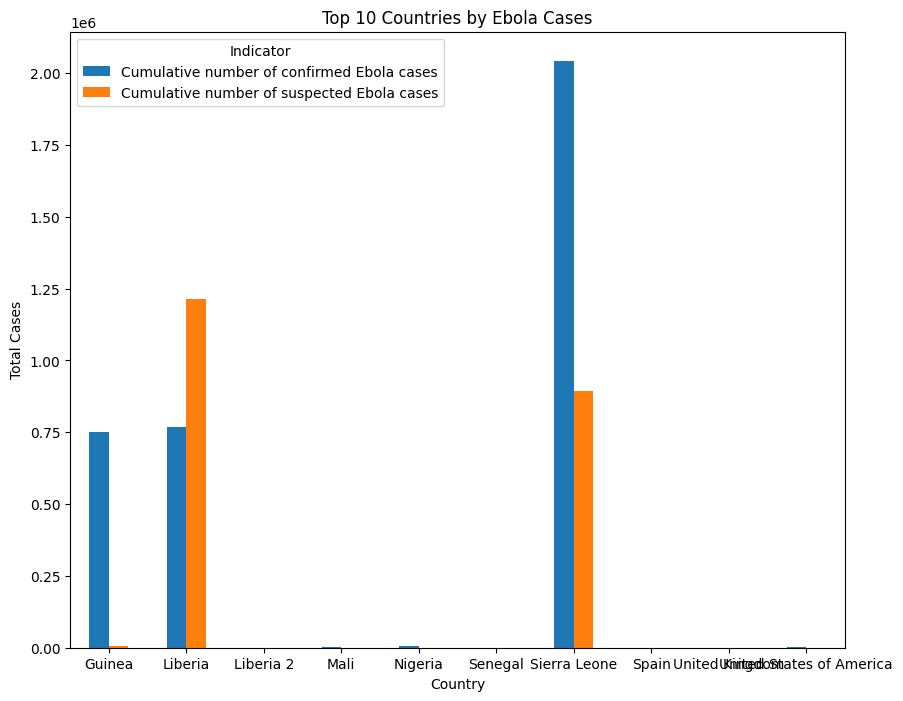

In [ ]:
# Calculate the total cases by country
total_cases_by_country = df[df['Indicator'] == 'Cumulative number of confirmed Ebola cases'].groupby('Country')['value'].sum().reset_index()
# Sort the countries by total cases and get the top 10
total_cases_by_country = total_cases_by_country.sort_values(by='value', ascending=False)

# Continue with the rest of your code
top_10_countries_confirmed = total_cases_by_country.head(10)['Country']
top_10_data = df[df['Country'].isin(top_10_countries_confirmed) & df['Indicator'].isin(['Cumulative number of confirmed Ebola cases', 'Cumulative number of suspected Ebola cases'])]
grouped_data = top_10_data.groupby(['Country', 'Indicator'])['value'].sum().unstack()
grouped_data.plot(kind='bar', figsize=(10, 8))
plt.title('Top 10 Countries by Ebola Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=0)
plt.show()

***PART II***

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/sample_data/DATA SET/song.csv')
display(pd.DataFrame(df1))
df2 = pd.DataFrame(df1)
high_frequency = df2.groupby(['song_title', 'year'])['rank'].sum().reset_index()
high_frequency = high_frequency.sort_values(by='rank', ascending=False)
high_frequency['Rank'] = high_frequency.groupby('year')['rank'].rank(ascending=False, method='min')
ranked_songs = high_frequency[high_frequency['Rank'] == 1]
table = tabulate(ranked_songs[['song_title', 'year', 'rank', 'Rank']],headers=['song_title', 'year', 'Frequency', 'Rank'],tablefmt='fancy_grid')
print(table)

,song_title,rank,year
0,Mysong1,1,2012
1,Mysong1,1,2013
2,Mysong1,2,2014
3,Mysong1,3,2015
4,Mysong2,2,2012
5,Mysong2,2,2013
6,Mysong2,1,2014
7,Mysong2,2,2015
8,Mysong3,3,2012
9,Mysong3,3,2013


╒════╤══════════════╤════════╤═════════════╤════════╕
│    │ song_title   │   year │   Frequency │   Rank │
╞════╪══════════════╪════════╪═════════════╪════════╡
│  3 │ Mysong1      │   2015 │           3 │      1 │
├────┼──────────────┼────────┼─────────────┼────────┤
│  8 │ Mysong3      │   2012 │           3 │      1 │
├────┼──────────────┼────────┼─────────────┼────────┤
│  9 │ Mysong3      │   2013 │           3 │      1 │
├────┼──────────────┼────────┼─────────────┼────────┤
│  2 │ Mysong1      │   2014 │           2 │      1 │
╘════╧══════════════╧════════╧═════════════╧════════╛


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
non_numeric_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df2 = pd.read_csv('/content/sample_data/DATA SET/Housing.csv')
df3 = pd.DataFrame(df2)
for col in non_numeric_columns:
    df3[col] = df3[col].map({'yes': 1, 'no': 0})


In [ ]:
# prompt: Create three equal-size buckets of House Price data. Bin the data into 3 quantiles (new column: quantile) of  'low', 'medium', 'high' based on "price" column in the House Price dataset.

# Create three equal-size buckets of House Price data.
# Bin the data into 3 quantiles (new column: quantile) of 'low', 'medium', 'high' based on "price" column.

# Assuming df3 is your DataFrame
df3['quantile'] = pd.qcut(df3['price'], q=3, labels=['low', 'medium', 'high'])

# Display the updated DataFrame to verify
print(df3[['price', 'quantile']])

        price quantile
0    13300000     high
1    12250000     high
2    12250000     high
3    12215000     high
4    11410000     high
..        ...      ...
540   1820000      low
541   1767150      low
542   1750000      low
543   1750000      low
544   1750000      low

[545 rows x 2 columns]


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashydv/housing-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 2.76MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ashydv/housing-dataset/versions/1
